## First we need to load some things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Shape_Maker import Data_Generator, make_rectangle, make_circle
from Visualizing_Model.Visualing_Model import visualization_model_class

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [3]:
image_size = 64

## The make_rectangle and make_circle will both return circles and rectangles, and the Data_Generator will randomly create circles or rectangles

In [ ]:
plt.imshow(make_rectangle(image_size))

In [ ]:
plt.imshow(make_circle(image_size))

## What do we need? We need a way to generate larges amounts of training data for our model..

### This is a 'generator', it is something which continously creates data

In [4]:
train_generator = Data_Generator(image_size=image_size,batch_size=32, num_examples_per_epoch=100)

In [5]:
x,y = train_generator.__getitem__(0)
print(x.shape)
print(y.shape)

(32, 64, 64, 1)
(32, 2)


## Now lets make our network!

In [6]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.optimizers import Adam

In [15]:
model = Sequential([
    Conv2D(1, (3,3), input_shape=(image_size, image_size, 1), padding='same',name='Conv_0'),
    MaxPool2D((image_size)), # Pool into a 1x1x6 image
    Flatten(),
    Dense(2),
    Activation('softmax')
])

In [16]:
model.compile(Adam(lr=1e-1), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit_generator(train_generator,epochs=3)

Epoch 1/3
100/100 [==============================] - 1s 15ms/step - loss: 0.1094 - acc: 0.9559
Epoch 2/3
100/100 [==============================] - 1s 14ms/step - loss: 0.0014 - acc: 1.0000
Epoch 3/3
100/100 [==============================] - 1s 14ms/step - loss: 6.0197e-04 - acc: 1.0000


In [18]:
def determine_accuracy(model, image_size= 64, num_examples=1000):
    truth = np.zeros((num_examples,1))
    guess = np.zeros((num_examples,1))
    index = 0
    for _ in range(num_examples//2):
        pred = model.predict(make_rectangle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        truth[index] = 1
        index += 1
    for _ in range(num_examples//2):
        pred = model.predict(make_circle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        index += 1
    print('Accuracy is {} for {} examples'.format(str((guess==truth).sum()/num_examples),num_examples))

In [19]:
determine_accuracy(model)

Accuracy is 1.0 for 1000 examples


In [ ]:
rectangle = make_rectangle(image_size)[None,...,None]
circle = make_circle(image_size)[None,...,None]
print(model.predict(rectangle)[...,1]*100)
print(model.predict(circle)[...,0]*100)

## Lets see what the kernels and activations look like

In [20]:
Visualizing_Class = visualization_model_class(model=model, desired_layer_names=['Conv_0'])

## Kernels

Conv_0


<IPython.core.display.Javascript object>


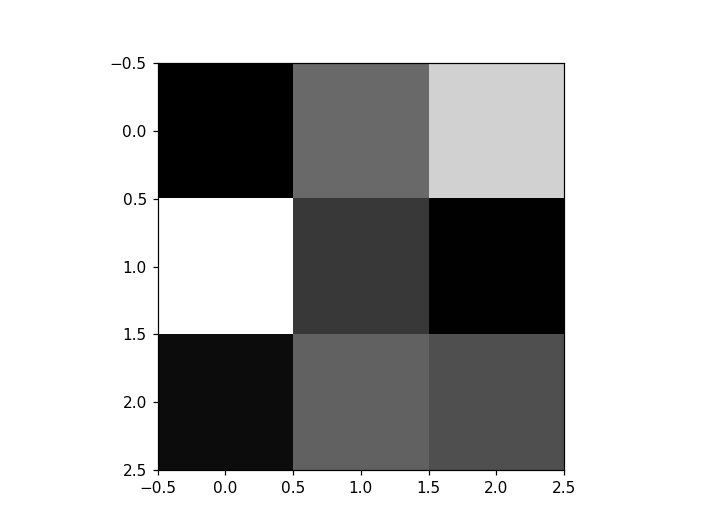

In [21]:
Visualizing_Class.plot_kernels()

## Activations
#### In order to make an activation map we need to provide it with something to predict on

In [ ]:
Visualizing_Class.predict_on_tensor(make_rectangle(image_size)[None,...,None])

In [ ]:
Visualizing_Class.plot_activations()

## How big is this model? Super tiny!!

In [ ]:
model.summary()